### <div align="center">***PRETRAINED MODEL (TRANSFER LEANING)***</div>
***
Utilizaremos VGG-16 por dar buenos resultados en algoritmos de clasificación de CNN.

In [1]:
from utils.utils import IMAGE_HEIGHT, IMAGE_WIDTH,IMAGE_CHANNELS, EPOCHS, BATCH_SIZE, PATIENCE

import numpy as np
import pandas as pd

from keras import layers, models
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping


c:\Users\Juan Cabruja\anaconda3\envs\Data_Science_Bootcamp\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Juan Cabruja\anaconda3\envs\Data_Science_Bootcamp\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\Juan Cabruja\anaconda3\envs\Data_Science_Bootcamp\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
## LOAD DATA
data = np.load('../data/data.npz')

X_train = data['X_train']
X_test = data['X_test']
X_val = data['X_val']
y_train = data['y_train']
y_test = data['y_test']
y_val = data['y_val']

In [8]:
X_train

array([[[[0.16182573, 0.43983402, 0.56846473],
         [0.15352697, 0.45643154, 0.56431535],
         [0.14107884, 0.46473029, 0.56846473],
         ...,
         [0.19087137, 0.41493776, 0.56016598],
         [0.19087137, 0.41493776, 0.56016598],
         [0.18257261, 0.41908714, 0.55186722]],

        [[0.14937759, 0.42738589, 0.55186722],
         [0.15767635, 0.43153527, 0.54771784],
         [0.14107884, 0.42738589, 0.54771784],
         ...,
         [0.17842324, 0.42738589, 0.56016598],
         [0.18257261, 0.41493776, 0.56016598],
         [0.17427386, 0.42323651, 0.54771784]],

        [[0.14107884, 0.43153527, 0.53941909],
         [0.13692946, 0.42323651, 0.53941909],
         [0.13692946, 0.41078838, 0.52697095],
         ...,
         [0.17012448, 0.42738589, 0.5560166 ],
         [0.17012448, 0.42738589, 0.54771784],
         [0.1659751 , 0.43153527, 0.54356846]],

        ...,

        [[0.14107884, 0.406639  , 0.5186722 ],
         [0.14522822, 0.406639  , 0.51452282]

In [3]:
## ALMACENAMOS EL MODELO EN UNA VARIABLE
VGG_layer = VGG16(include_top =False,input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS),weights= None)

In [4]:
x = layers.Flatten()(VGG_layer.output)

x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(VGG_layer.input, x)
    
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])

In [5]:
## ENTRENAMIENTO DEL MODELO

earlystop =EarlyStopping(patience= PATIENCE, restore_best_weights= True)
history = model.fit(X_train,y_train,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks = [earlystop],
                    validation_data= (X_val, y_val),
                    verbose= 2)

Epoch 1/50
148/148 - 292s - loss: 0.7634 - acc: 0.5072 - val_loss: 0.6916 - val_acc: 0.5957 - 292s/epoch - 2s/step
Epoch 2/50
148/148 - 311s - loss: 0.6919 - acc: 0.5123 - val_loss: 0.6935 - val_acc: 0.4043 - 311s/epoch - 2s/step
Epoch 3/50
148/148 - 304s - loss: 0.6935 - acc: 0.5000 - val_loss: 0.6943 - val_acc: 0.4043 - 304s/epoch - 2s/step
Epoch 4/50
148/148 - 302s - loss: 0.6935 - acc: 0.4844 - val_loss: 0.6929 - val_acc: 0.5957 - 302s/epoch - 2s/step
Epoch 5/50
148/148 - 307s - loss: 0.6934 - acc: 0.4928 - val_loss: 0.6931 - val_acc: 0.4043 - 307s/epoch - 2s/step
Epoch 6/50
148/148 - 303s - loss: 0.6933 - acc: 0.4848 - val_loss: 0.6935 - val_acc: 0.4043 - 303s/epoch - 2s/step
Epoch 7/50
148/148 - 298s - loss: 0.6933 - acc: 0.4852 - val_loss: 0.6928 - val_acc: 0.5957 - 298s/epoch - 2s/step
Epoch 8/50
148/148 - 318s - loss: 0.6933 - acc: 0.4915 - val_loss: 0.6935 - val_acc: 0.4043 - 318s/epoch - 2s/step
Epoch 9/50
148/148 - 318s - loss: 0.6934 - acc: 0.4954 - val_loss: 0.6927 - val_

In [6]:
## BEST SCORE
results = model.evaluate(X_train)
print("best score train:", results)

74/74 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
best score train: [0.0, 0.0]


NameError: name 'plt' is not defined

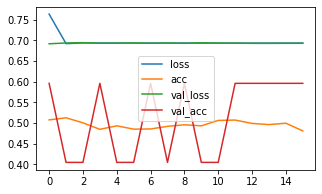

In [7]:
## GRAFICA HISTORIAL
pd.DataFrame(history.history).plot(figsize=(5, 3))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
## MATRIZ DE CONFUSION
confu_mat = confusion_matrix(y_train, model.predict(X_train).round(0), normalize = 'pred')
sns.heatmap(confu_mat/np.sum(confu_mat,axis=1), annot=True)

In [ ]:
## GUARDAMOS MODELO
model.save("./models/modelo-VGG16.h5") 